In [122]:
from IPython.display import Image

Topic : 
- Linear Regression
- Logistic Regression
- common pitfalls in supervised learning, and especially the problem of linear separability of data;
- differences between linear and logistic regression

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

import matplotlib.pyplot as plt
import matplotlib as mlp
%matplotlib inline

In [85]:
df = pd.read_csv("data_2_cat.csv")

In [86]:
df = df.drop(df.columns[0], axis=1)

In [87]:
df['tier'] = df['tier'].replace(['First','Second'],['1','2'])
df['tier'] = df['tier'].astype(float)

In [88]:
df = df.drop('Country',axis=1)

In [89]:
df2 = df.copy()

In [90]:
df = df.drop('Happiness Rank',axis=1)

In [91]:
df = df.drop('Happiness Score',axis=1)

In [92]:
df.head()

,Year,GDP per Capita,Social support,Life Expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,tier
0,2015,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,1.0
1,2015,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,1.0
2,2015,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,1.0
3,2015,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,1.0
4,2015,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,1.0


In [93]:
df2.head()

,Year,Happiness Rank,Happiness Score,GDP per Capita,Social support,Life Expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,tier
0,2015,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,1.0
1,2015,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,1.0
2,2015,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,1.0
3,2015,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,1.0
4,2015,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,1.0


In [60]:
df.dtypes

Year                              int64
GDP per Capita                  float64
Social support                  float64
Life Expectancy                 float64
Freedom to make life choices    float64
Perceptions of corruption       float64
Generosity                      float64
tier                            float64
dtype: object

The class feature is numeric so we an proceed with the linear regression and classification

In [83]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.03, 'Happiness Score vs. features')

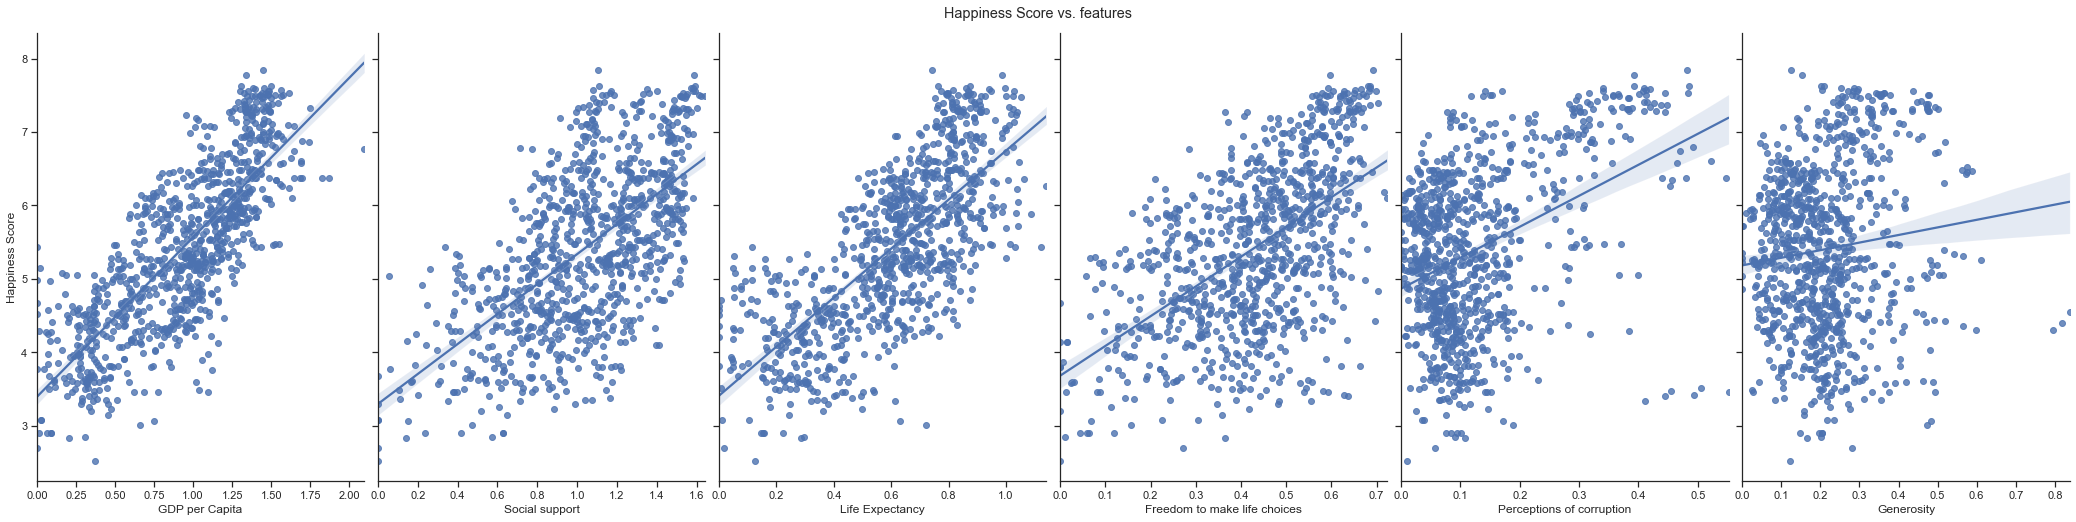

In [94]:
ax_pairs = sns.pairplot(df2, x_vars=['GDP per Capita','Social support','Life Expectancy','Freedom to make life choices','Perceptions of corruption'
                                   ,'Generosity'], 
                         y_vars='Happiness Score', size=7, aspect=0.7, kind='reg')

ax_pairs.fig.suptitle('Happiness Score vs. features', y=1.03)

 we created a pairs plot of the correlations between each feature of the dataset and the happiness score

In [61]:
from sklearn.model_selection import train_test_split
# Creating independent and dependent variables
X = df.drop('tier',axis=1)
y = df['tier']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Train Data: {X_test.shape}, {y_test.shape}")

Train Data: (744, 7), (744,)
Train Data: (187, 7), (187,)


## Linear regression

https://www.geeksforgeeks.org/python-linear-regression-using-sklearn/

In [62]:
from sklearn.linear_model import LinearRegression

In [123]:
regr_tr = LinearRegression()  
regr_tr.fit(X_train, y_train)

LinearRegression()

In [124]:
y_pred_lr_tr = regr_tr.predict(X_train)

In [65]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

MSE on training set

In [125]:
mse_tr = mean_squared_error(y_true=y_train,y_pred=y_pred_lr_tr)
print("MSE:",mse_tr)

MSE: 0.11255401840981659


What hypothesis can you make about this data set being linearly separable or not?

https://stats.stackexchange.com/questions/47923/test-for-linear-separability

https://www.tarekatwan.com/index.php/2017/12/methods-for-testing-linear-separability-in-python/

array([[<AxesSubplot:xlabel='GDP per Capita', ylabel='GDP per Capita'>,
        <AxesSubplot:xlabel='Social support', ylabel='GDP per Capita'>,
        <AxesSubplot:xlabel='Life Expectancy', ylabel='GDP per Capita'>,
        <AxesSubplot:xlabel='Freedom to make life choices', ylabel='GDP per Capita'>,
        <AxesSubplot:xlabel='Perceptions of corruption', ylabel='GDP per Capita'>],
       [<AxesSubplot:xlabel='GDP per Capita', ylabel='Social support'>,
        <AxesSubplot:xlabel='Social support', ylabel='Social support'>,
        <AxesSubplot:xlabel='Life Expectancy', ylabel='Social support'>,
        <AxesSubplot:xlabel='Freedom to make life choices', ylabel='Social support'>,
        <AxesSubplot:xlabel='Perceptions of corruption', ylabel='Social support'>],
       [<AxesSubplot:xlabel='GDP per Capita', ylabel='Life Expectancy'>,
        <AxesSubplot:xlabel='Social support', ylabel='Life Expectancy'>,
        <AxesSubplot:xlabel='Life Expectancy', ylabel='Life Expectancy'>,
      

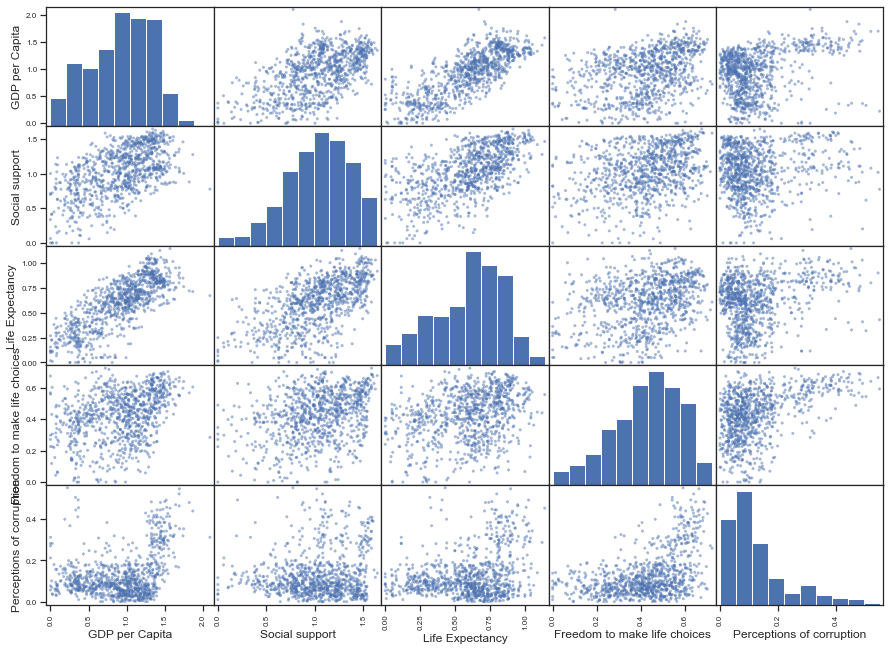

In [99]:
pd.plotting.scatter_matrix(df.iloc[:,1:6], figsize=(15,11))

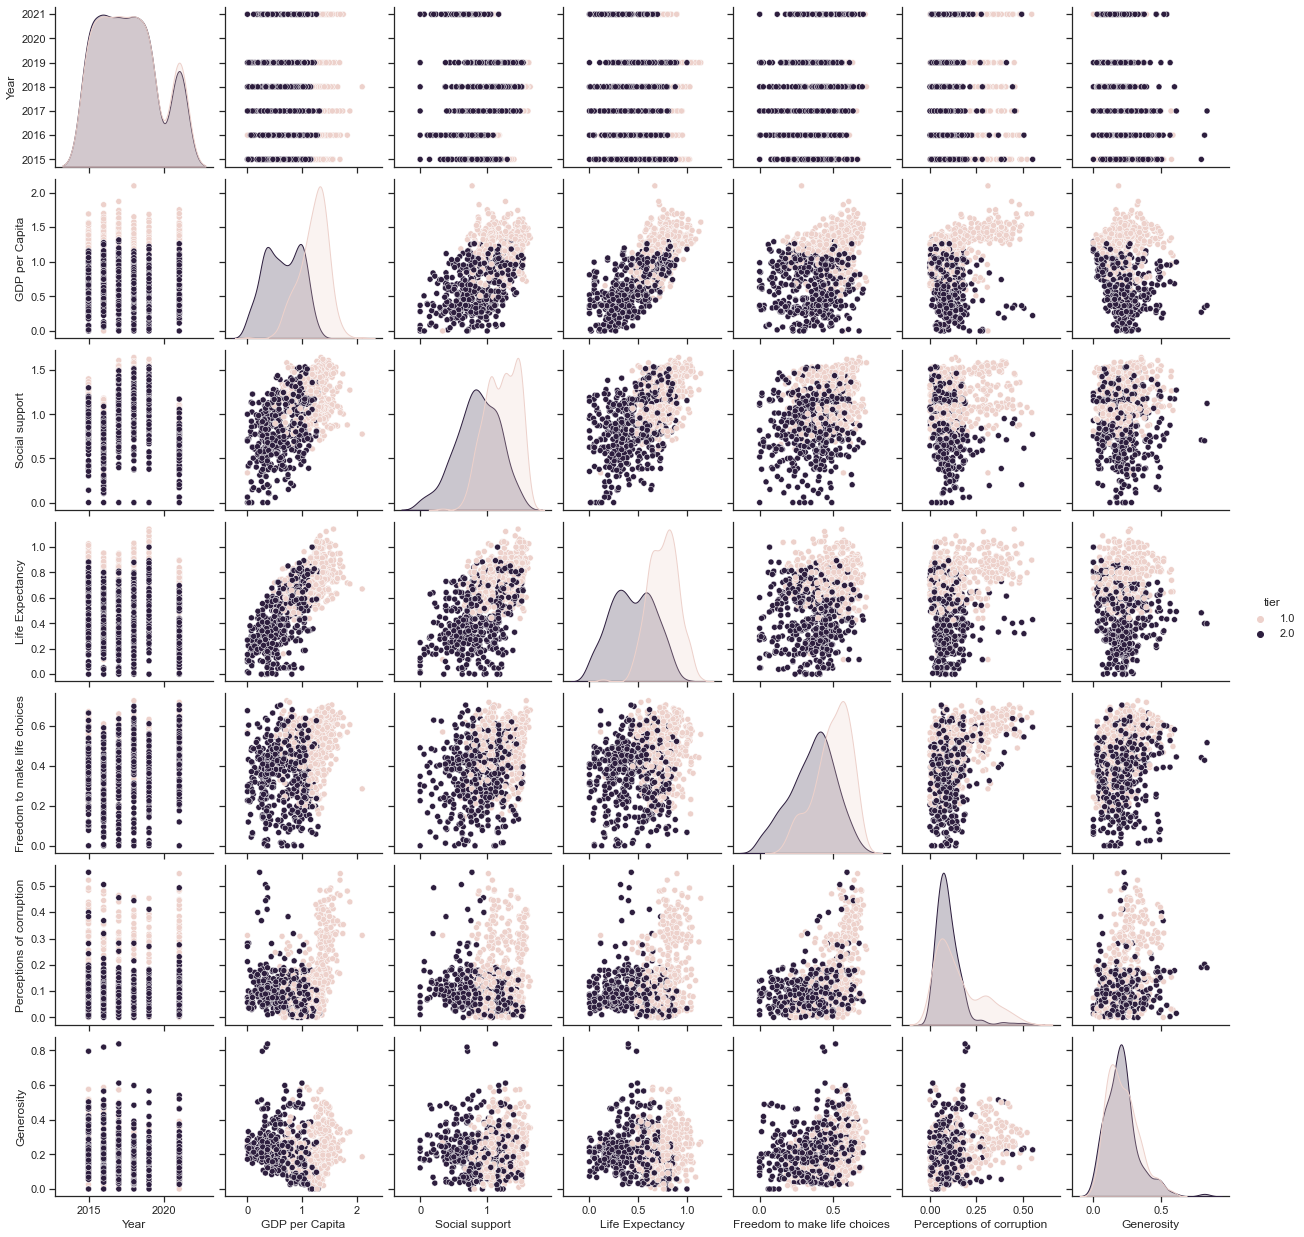

In [185]:
sns.set_theme(style="ticks")
sns.pairplot(df, hue='tier')

array([[<AxesSubplot:xlabel='Year', ylabel='Year'>,
        <AxesSubplot:xlabel='GDP per Capita', ylabel='Year'>,
        <AxesSubplot:xlabel='Social support', ylabel='Year'>,
        <AxesSubplot:xlabel='Life Expectancy', ylabel='Year'>,
        <AxesSubplot:xlabel='Freedom to make life choices', ylabel='Year'>,
        <AxesSubplot:xlabel='Perceptions of corruption', ylabel='Year'>,
        <AxesSubplot:xlabel='Generosity', ylabel='Year'>,
        <AxesSubplot:xlabel='tier', ylabel='Year'>],
       [<AxesSubplot:xlabel='Year', ylabel='GDP per Capita'>,
        <AxesSubplot:xlabel='GDP per Capita', ylabel='GDP per Capita'>,
        <AxesSubplot:xlabel='Social support', ylabel='GDP per Capita'>,
        <AxesSubplot:xlabel='Life Expectancy', ylabel='GDP per Capita'>,
        <AxesSubplot:xlabel='Freedom to make life choices', ylabel='GDP per Capita'>,
        <AxesSubplot:xlabel='Perceptions of corruption', ylabel='GDP per Capita'>,
        <AxesSubplot:xlabel='Generosity', ylabel='GDP

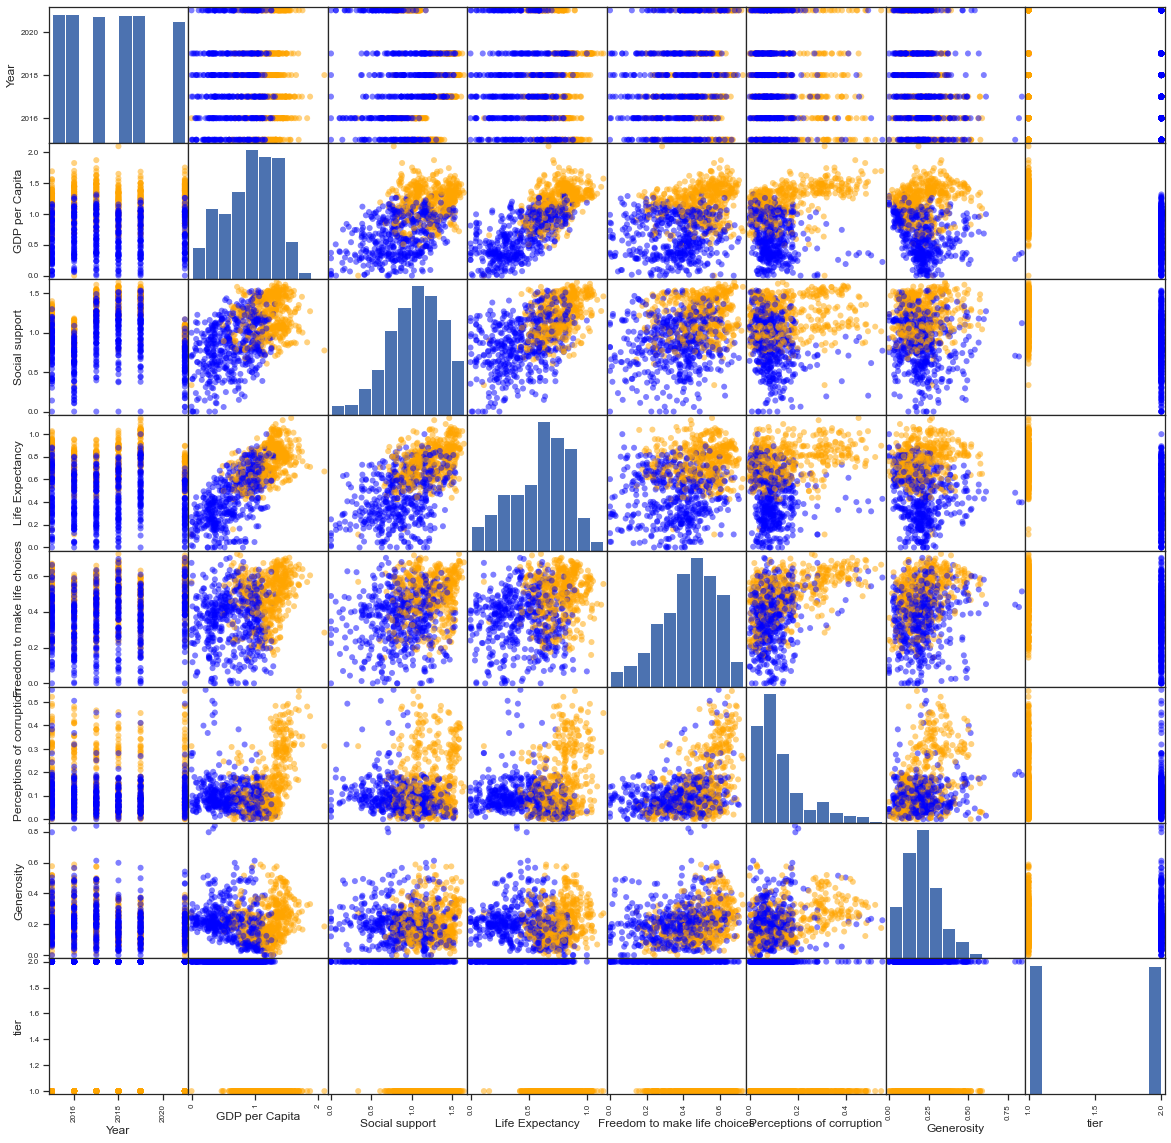

In [186]:
# plot scatter matrix using pandas and matplotlib
val = df['tier'].unique()
colors = {val[0]:'orange', val[1]:'blue'}
pd.plotting.scatter_matrix(df,figsize=(20,20),grid=True,
                           marker='o', c= df['tier'].map(colors))

The scatter matrix above is a pair-wise scatter plot for all features in the data set. The scatter matrix provides insight into how these variables are correlated. Let’s expand upon this by creating a scatter plot for the Life expectancy vs gdp per capita from the scatter matrix.

Note : The higher the class correlation (of the x and y axes) the clearer the clusters

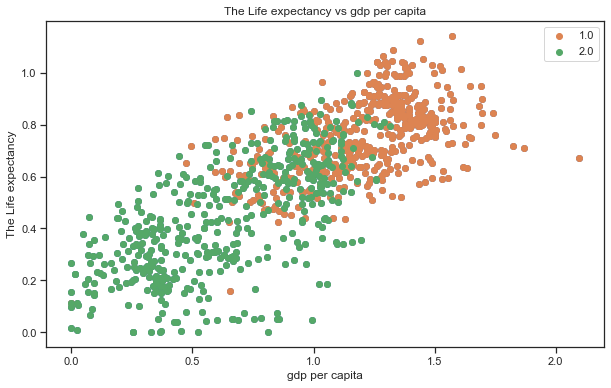

In [120]:
plt.figure(figsize=(10,6))
values = df['tier'].unique()
colors = ['b','r','g']
label = df.tier
plt.scatter(df.iloc[:,1], df.iloc[:,3])
plt.title('The Life expectancy vs gdp per capita')
plt.xlabel('gdp per capita')
plt.ylabel('The Life expectancy')
for i in range(0,2):
    bucket = df[df['tier'] == values[i]]
    bucket = bucket.iloc[:,[1,3]].values
    plt.scatter(bucket[:, 0], bucket[:, 1], label=values[i]) 
plt.legend()
plt.show()

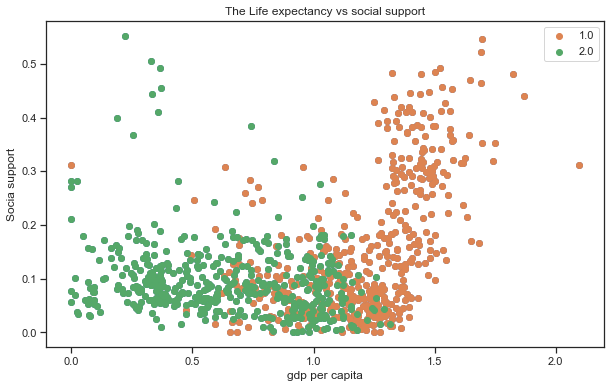

In [116]:
plt.figure(figsize=(10,6))
values = df['tier'].unique()
colors = ['b','r']
label = df.tier
plt.scatter(df.iloc[:,1], df.iloc[:,5])
plt.title('The Life expectancy vs social support')
plt.xlabel('gdp per capita')
plt.ylabel('Socia support')
for i in range(0,2):
    bucket = df[df['tier'] == values[i]]
    bucket = bucket.iloc[:,[1,5]].values
    plt.scatter(bucket[:, 0], bucket[:, 1], label=values[i]) 
plt.legend()
plt.show()

convex hull represents the outer boundaries of a group of data points (classes) 

In [117]:
from scipy.spatial import ConvexHull

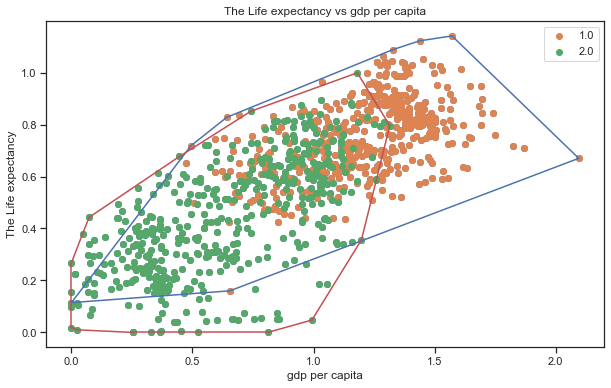

In [119]:
plt.figure(figsize=(10,6))
values = df['tier'].unique()
colors = ['b','r','g']
label = df.tier
plt.scatter(df.iloc[:,1], df.iloc[:,3])
plt.title('The Life expectancy vs gdp per capita')
plt.xlabel('gdp per capita')
plt.ylabel('The Life expectancy')
for i in range(0,2):
    bucket = df[df['tier'] == values[i]]
    bucket = bucket.iloc[:,[1,3]].values
    hull = ConvexHull(bucket)
    plt.scatter(bucket[:, 0], bucket[:, 1], label=values[i]) 
    for j in hull.simplices:
        plt.plot(bucket[j,0], bucket[j,1], colors[i])    
plt.legend()
plt.show()

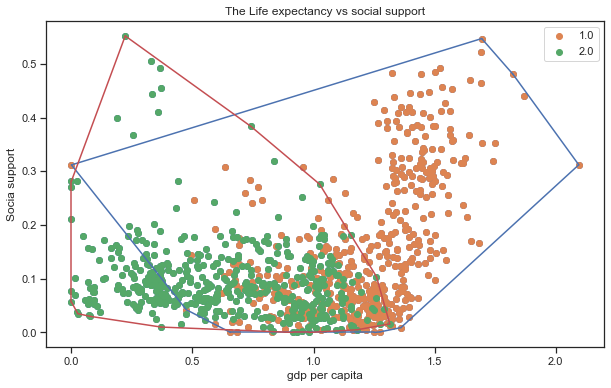

In [121]:
plt.figure(figsize=(10,6))
values = df['tier'].unique()
colors = ['b','r']
label = df.tier
plt.scatter(df.iloc[:,1], df.iloc[:,5])
plt.title('The Life expectancy vs social support')
plt.xlabel('gdp per capita')
plt.ylabel('Socia support')
for i in range(0,2):
    bucket = df[df['tier'] == values[i]]
    bucket = bucket.iloc[:,[1,5]].values
    plt.scatter(bucket[:, 0], bucket[:, 1], label=values[i]) 
    hull = ConvexHull(bucket)
    for j in hull.simplices:
        plt.plot(bucket[j,0], bucket[j,1], colors[i])    
plt.legend()
plt.show()

In [67]:
regr = LinearRegression()  
regr.fit(X_train, y_train)

LinearRegression()

In [68]:
y_pred_lr = regr.predict(X_test)

Evaluation metrics on test set 

https://betterprogramming.pub/data-science-modeling-how-to-use-linear-regression-with-python-fdf6ca5481be 

MSE is an evaluation metric that measures the average of the squared differences between the observed and predicted values. In other words, MSE tells us how accurate or inaccurate our linear regression model is — the lower the MSE, the “better” the model is at predicting values.

MSE greatly punishes outliers

The distance between the actual value and predicted values is called residual. If the observed points are far from the regression line, then the residual will be high, and so MSE will high. If the scatter points are close to the regression line, then the residual will be small and hence the MSE will be small as well.

In [70]:
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred_lr)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred_lr) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred_lr,squared=False)
  
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.27186665517600617
MSE: 0.10914938999552788
RMSE: 0.33037764754221477


In [216]:
regr.coef_

array([ 0.00888718, -0.50072437, -0.2044792 , -0.35579325, -0.67446692,
        0.03212242,  0.02100288])

How well does the linear classifier generalize to new data?

https://reason.town/linear-classifier-machine-learning/#:~:text=The%20Support%20Vector%20Machine%20%28SVM%29%20is%20a%20linear,the%20hyperplane%20that%20maximally%20separates%20the%20two%20classes. 

### SVM

The standard SVM classification setting is binary classification, where there are two classes of data (positive and negative). The goal of the SVM is to find the hyperplane that maximally separates the two classes. This can be done by solving a Quadratic Programming (QP) problem. In some cases, it may be impossible to find a perfect hyperplane that separates the two classes perfectly. In these cases, we can allow the SVM to make some classification errors by using a soft margin. The soft margin SVM formulation is also a QP problem, which can be solved using various algorithms.

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [71]:
from sklearn.svm import SVC

In [72]:
svc = SVC()  
svc.fit(X_train, y_train)

SVC()

In [73]:
y_pred_svc = svc.predict(X_test)

MSE on the test set

In [74]:
mse_svc = mean_squared_error(y_true=y_test,y_pred=y_pred_svc) #default=True
print("MSE:",mse_svc)

MSE: 0.5935828877005348


In [212]:
from sklearn.linear_model import SGDClassifier

In [213]:
sgd = SGDClassifier()  
sgd.fit(X_train, y_train)

SGDClassifier()

In [214]:
y_pred_sgd = sgd.predict(X_test)

In [215]:
mse_sgd = mean_squared_error(y_true=y_test,y_pred=y_pred_sgd) #default=True
print("MSE:",mse_sgd)

MSE: 0.40641711229946526


### Logisitc regression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [75]:
from sklearn.linear_model import LogisticRegression

In [126]:
log_tr  = LogisticRegression()
log_tr.fit(X_train, y_train)

LogisticRegression()

In [127]:
y_pred_log_tr = log_tr.predict(X_train)

Error on the training set :

In [128]:
mse_log_lr = mean_squared_error(y_true=y_train,y_pred=y_pred_log_tr)
print("MSE:",mse_log_lr)

MSE: 0.15456989247311828


In [76]:
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

In [77]:
y_pred_log = log.predict(X_test)

Error on the test set :

In [78]:
mse_log = mean_squared_error(y_true=y_test,y_pred=y_pred_log) #default=True
print("MSE:",mse_log)

MSE: 0.13903743315508021


In [207]:
from sklearn.metrics import accuracy_score

In [208]:
print(f"Accuracy of the classifier is: {accuracy_score(y_test, y_pred_log)}")

Accuracy of the classifier is: 0.8609625668449198


Experiment with various regression parameters that control the learning. For example: the learning rate, the number of iterations and batch size.

The learning rate :

sklearn.linear_model.LogisticRegression doesn't use SGD, so there's no learning rate. (sklearn.linear_model.SGDClassifier is the linear classifier with SGD training. )

The number of iterations : Maximum number of iterations taken for the solvers to converge.

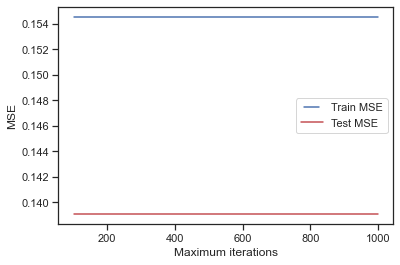

In [140]:
max_depths = np.linspace(100, 1000, 1000, endpoint=True).astype(int)
train_results = []
test_results = []
for max_depth in max_depths:
    dt = LogisticRegression(max_iter=max_depth)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    mse_tr = mean_squared_error(y_true=y_train,y_pred=train_pred)
    # Add to previous train results
    train_results.append(mse_tr)
    
    y_pred = dt.predict(X_test)
    mse = mean_squared_error(y_true=y_test,y_pred= y_pred)
    # Add to previous test results
    test_results.append(mse)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train MSE")
line2, = plt.plot(max_depths, test_results, 'r', label="Test MSE")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("MSE")
plt.xlabel("Maximum iterations")
plt.show()

tolfloat, default=1e-4: This specifies the tolerance value to stop the iteration.

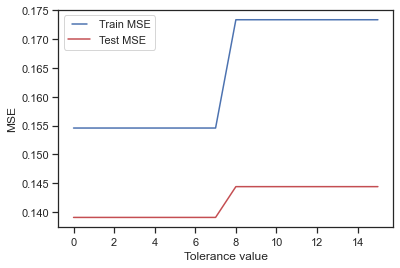

In [167]:
max_depths = np.linspace(0.001, 15, 15, endpoint=True).astype(int)
train_results = []
test_results = []
for max_depth in max_depths:
    dt = LogisticRegression(tol =max_depth)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    mse_tr = mean_squared_error(y_true=y_train,y_pred=train_pred)
    # Add to previous train results
    train_results.append(mse_tr)
    
    y_pred = dt.predict(X_test)
    mse = mean_squared_error(y_true=y_test,y_pred= y_pred)
    # Add to previous test results
    test_results.append(mse)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train MSE")
line2, = plt.plot(max_depths, test_results, 'r', label="Test MSE")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("MSE")
plt.xlabel("Tolerance value")
plt.show()

Cfloat, default=1.0: It is the inverse of the regularisation strength and must be a positive floating point number. (smaller values specify stronger regularization.)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


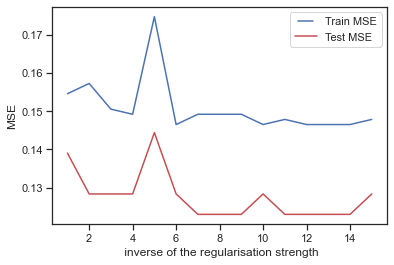

In [168]:
max_depths = np.linspace(1, 15, 15, endpoint=True).astype(int)
train_results = []
test_results = []
for max_depth in max_depths:
    dt = LogisticRegression(C =max_depth)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    mse_tr = mean_squared_error(y_true=y_train,y_pred=train_pred)
    # Add to previous train results
    train_results.append(mse_tr)
    
    y_pred = dt.predict(X_test)
    mse = mean_squared_error(y_true=y_test,y_pred= y_pred)
    # Add to previous test results
    test_results.append(mse)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train MSE")
line2, = plt.plot(max_depths, test_results, 'r', label="Test MSE")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("MSE")
plt.xlabel(" inverse of the regularisation strength")
plt.show()

GridSearchCV

In [146]:
from sklearn.model_selection import GridSearchCV

In [148]:
params = {'penalty':['l1' ,'l2', 'elasticnet', 'none']}
grid_search_cv = GridSearchCV(LogisticRegression(), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
6 fits failed out of a total of 12.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError(
ValueError:

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             verbose=1)

In [154]:
grid_search_cv.best_estimator_

LogisticRegression(penalty='none')

In [150]:
params2 = {'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [151]:
grid_search_cv2 = GridSearchCV(LogisticRegression(), params2, verbose=1, cv=3)
grid_search_cv2.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


C:\Users\Asus\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Asus\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Asus\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Asus\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Asus\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=1)

In [156]:
grid_search_cv2.best_estimator_

LogisticRegression(solver='liblinear')

In [152]:
params3 = {'multi_class':['auto', 'ovr', 'multinomial']}

In [153]:
grid_search_cv3 = GridSearchCV(LogisticRegression(), params3, verbose=1, cv=3)
grid_search_cv3.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'multi_class': ['auto', 'ovr', 'multinomial']},
             verbose=1)

In [157]:
grid_search_cv3.best_estimator_

LogisticRegression(multi_class='multinomial')

If the option chosen is ‘ovr’, then a binary problem is fit for each label. For ‘multinomial’ the loss minimised is the multinomial loss fit across the entire probability distribution, even when the data is binary. ‘multinomial’ is unavailable when solver=’liblinear’. ‘auto’ selects ‘ovr’ if the data is binary, or if solver=’liblinear’, and otherwise selects ‘multinomial’.

In [158]:
params4 = {'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],'multi_class':['auto', 'ovr', 'multinomial']}

In [159]:
grid_search_cv4 = GridSearchCV(LogisticRegression(), params4, verbose=1, cv=3)
grid_search_cv4.fit(X_train, y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


C:\Users\Asus\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Asus\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Asus\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Asus\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Asus\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'multi_class': ['auto', 'ovr', 'multinomial'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=1)

In [160]:
grid_search_cv4.best_estimator_

LogisticRegression(solver='liblinear')

Acording to Grid search the best parameters are linlinear for solver and the default (auto) for the multi_class 

For solver default is ‘lbfgs’.

For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones;

For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;

‘liblinear’ is limited to one-versus-rest schemes.

In [161]:
params5 = {'penalty':['l1' ,'l2', 'elasticnet', 'none'],'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],'multi_class':['auto', 'ovr', 'multinomial']}

In [162]:
grid_search_cv5 = GridSearchCV(LogisticRegression(), params5, verbose=1, cv=3)
grid_search_cv5.fit(X_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Asus\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Asus\anaconda3\lib\site-packages\scipy\o

C:\Users\Asus\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Asus\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=1)

In [163]:
grid_search_cv5.best_estimator_

LogisticRegression(penalty='l1', solver='liblinear')

the norm of the penalty:

'none': no penalty is added;

'l2': add a L2 penalty term and it is the default choice;

'l1': add a L1 penalty term;

'elasticnet': both L1 and L2 penalty terms are added.

Supported penalties by solver:

‘newton-cg’ - [‘l2’, ‘none’]

‘lbfgs’ - [‘l2’, ‘none’]

‘liblinear’ - [‘l1’, ‘l2’]

‘sag’ - [‘l2’, ‘none’]

‘saga’ - [‘elasticnet’, ‘l1’, ‘l2’, ‘none’]

https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c 

A regression model that uses L1 regularization technique is called Lasso Regression and model which uses L2 is called Ridge Regression.

- Ridge regression adds “squared magnitude” of coefficient as penalty term to the loss function
- Lasso Regression (Least Absolute Shrinkage and Selection Operator) adds “absolute value of magnitude” of coefficient as penalty term to the loss function.
- The key difference between these techniques is that Lasso shrinks the less important feature’s coefficient to zero thus, removing some feature altogether. So, this works well for feature selection in case we have a huge number of features.

According to GridSearh, the ideal combination of parameters would be :
- penalty : l1
- solver : liblinear 
- multi-class : auto 

class sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

In [164]:
log_opt1 = LogisticRegression(penalty = 'l1', solver = 'liblinear')

In [171]:
log_opt1.fit(X_train, y_train)
y_pred_log_opt = log_opt1.predict(X_test)

In [172]:
mse_log_opt = mean_squared_error(y_true=y_test,y_pred=y_pred_log_opt)
print("MSE:",mse_log_opt)

MSE: 0.12834224598930483


Following the results from the graph, the MSE was at it's lowet for Cflot = 8 

In [170]:
log_opt2 = LogisticRegression(penalty = 'l1', solver = 'liblinear', C = 8)

In [173]:
log_opt2.fit(X_train, y_train)
y_pred_log_opt2 = log_opt2.predict(X_test)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [178]:
mse_log_opt2 = mean_squared_error(y_true=y_test,y_pred=y_pred_log_opt2)
print("MSE:",mse_log_opt2)

MSE: 0.12834224598930483


Due to the warning : ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.

In [174]:
log_opt3 = LogisticRegression(penalty = 'l1', solver = 'liblinear', C = 8, max_iter = 200)

In [175]:
log_opt3.fit(X_train, y_train)
y_pred_log_opt3 = log_opt3.predict(X_test)

In [179]:
mse_log_opt3 = mean_squared_error(y_true=y_test,y_pred=y_pred_log_opt3)
print("MSE:",mse_log_opt3)

MSE: 0.12834224598930483


The MSE stayed stable despite the change in Inverse of regularization strength

Changing the solver did not seem to change the lack of effect of number of iterations :

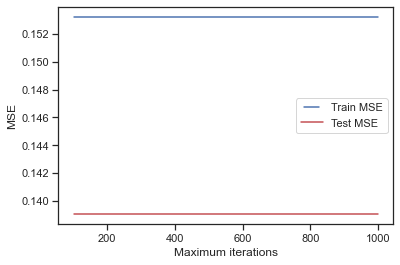

In [182]:
max_depths = np.linspace(100, 1000, 1000, endpoint=True).astype(int)
train_results = []
test_results = []
for max_depth in max_depths:
    dt = LogisticRegression(solver = 'liblinear',max_iter=max_depth)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    mse_tr = mean_squared_error(y_true=y_train,y_pred=train_pred)
    # Add to previous train results
    train_results.append(mse_tr)
    
    y_pred = dt.predict(X_test)
    mse = mean_squared_error(y_true=y_test,y_pred= y_pred)
    # Add to previous test results
    test_results.append(mse)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train MSE")
line2, = plt.plot(max_depths, test_results, 'r', label="Test MSE")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("MSE")
plt.xlabel("Maximum iterations")
plt.show()

Changing the penalty however seems to affect the training MSE although not noticebly :

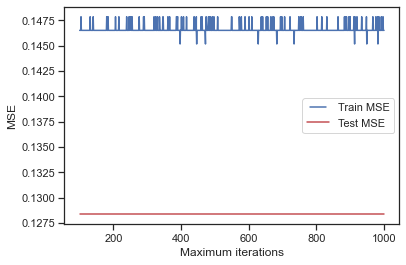

In [183]:
max_depths = np.linspace(100, 1000, 1000, endpoint=True).astype(int)
train_results = []
test_results = []
for max_depth in max_depths:
    dt = LogisticRegression(penalty = 'l1',solver = 'liblinear',max_iter=max_depth)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    mse_tr = mean_squared_error(y_true=y_train,y_pred=train_pred)
    # Add to previous train results
    train_results.append(mse_tr)
    
    y_pred = dt.predict(X_test)
    mse = mean_squared_error(y_true=y_test,y_pred= y_pred)
    # Add to previous test results
    test_results.append(mse)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train MSE")
line2, = plt.plot(max_depths, test_results, 'r', label="Test MSE")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("MSE")
plt.xlabel("Maximum iterations")
plt.show()

Make conclusions: what was the influence of various parameters on the classifier’s performance? Hypothesise why.